# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [7]:
#loading the tidyverse and the data set
library("tidyverse")
tornadoes = read_csv("us_tornado_dataset_1950_2021.csv") 
#I downloaded this CSV file locally using a link from Tidy Tuesday, and imported it to my "assignments" folder. 
#I'm not sure if pushing this notebook to Github will preserve the database structure so just in case, 
#here is the URL where I found the file: https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021

Rows: 67558 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): st
dbl  (12): yr, mo, dy, mag, inj, fat, slat, slon, elat, elon, len, wid
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
#Viewing the first five rows of the data to get an idea of how the data frame is organized:
tornadoes |> head()

yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
<dbl>,<dbl>,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100
1950,1,25,1950-01-25,MO,2,5,0,37.60,-90.68,37.63,-90.65,2.3,300


## Variable Names
 Here is a list of the names of the variables in this data set, since they are not all intuitively named!
|Variable|Name|
|--------|----|
|yr|Year|
|mo|Month|
|dy|Day|
|date|Date|
|st|State|
|mag|Magnitude on F/EF scale|
|inj|Number of injuries|
|fat|Number of fatalities|
|slat|Starting latitude|
|slon|Starting longitude|
|elat|Ending latitude|
|elon|Ending longitude|
|len|Length|
|wid|Width|

What jumped out to me about this data set is the fact that "State" was one of the variables. I thought it might be useful to first determine which state(s) had the highest cumulative frequency of tornadoes to  try to identify any geographic trends. As seen in the graph below, the top 5 states are Texas, Kansas, Oklahoma, Florida, and Nebraska, which intuitively makes sense because many of these states are well-known for being part of "Tornado Alley." What really stood out to me was that Texas far surpassed other states in terms of the frequency of tornadoes. This could be due to the sheer size of the state, but I decided that this graph was a good jumping-off point for some some further exploration to find any temporal trends in the states with the top 5 cumulative frequencies of tornado events, and see if Texas' high frequency of tornadoes was a typical trend or perhaps only occurred during a specific time period.

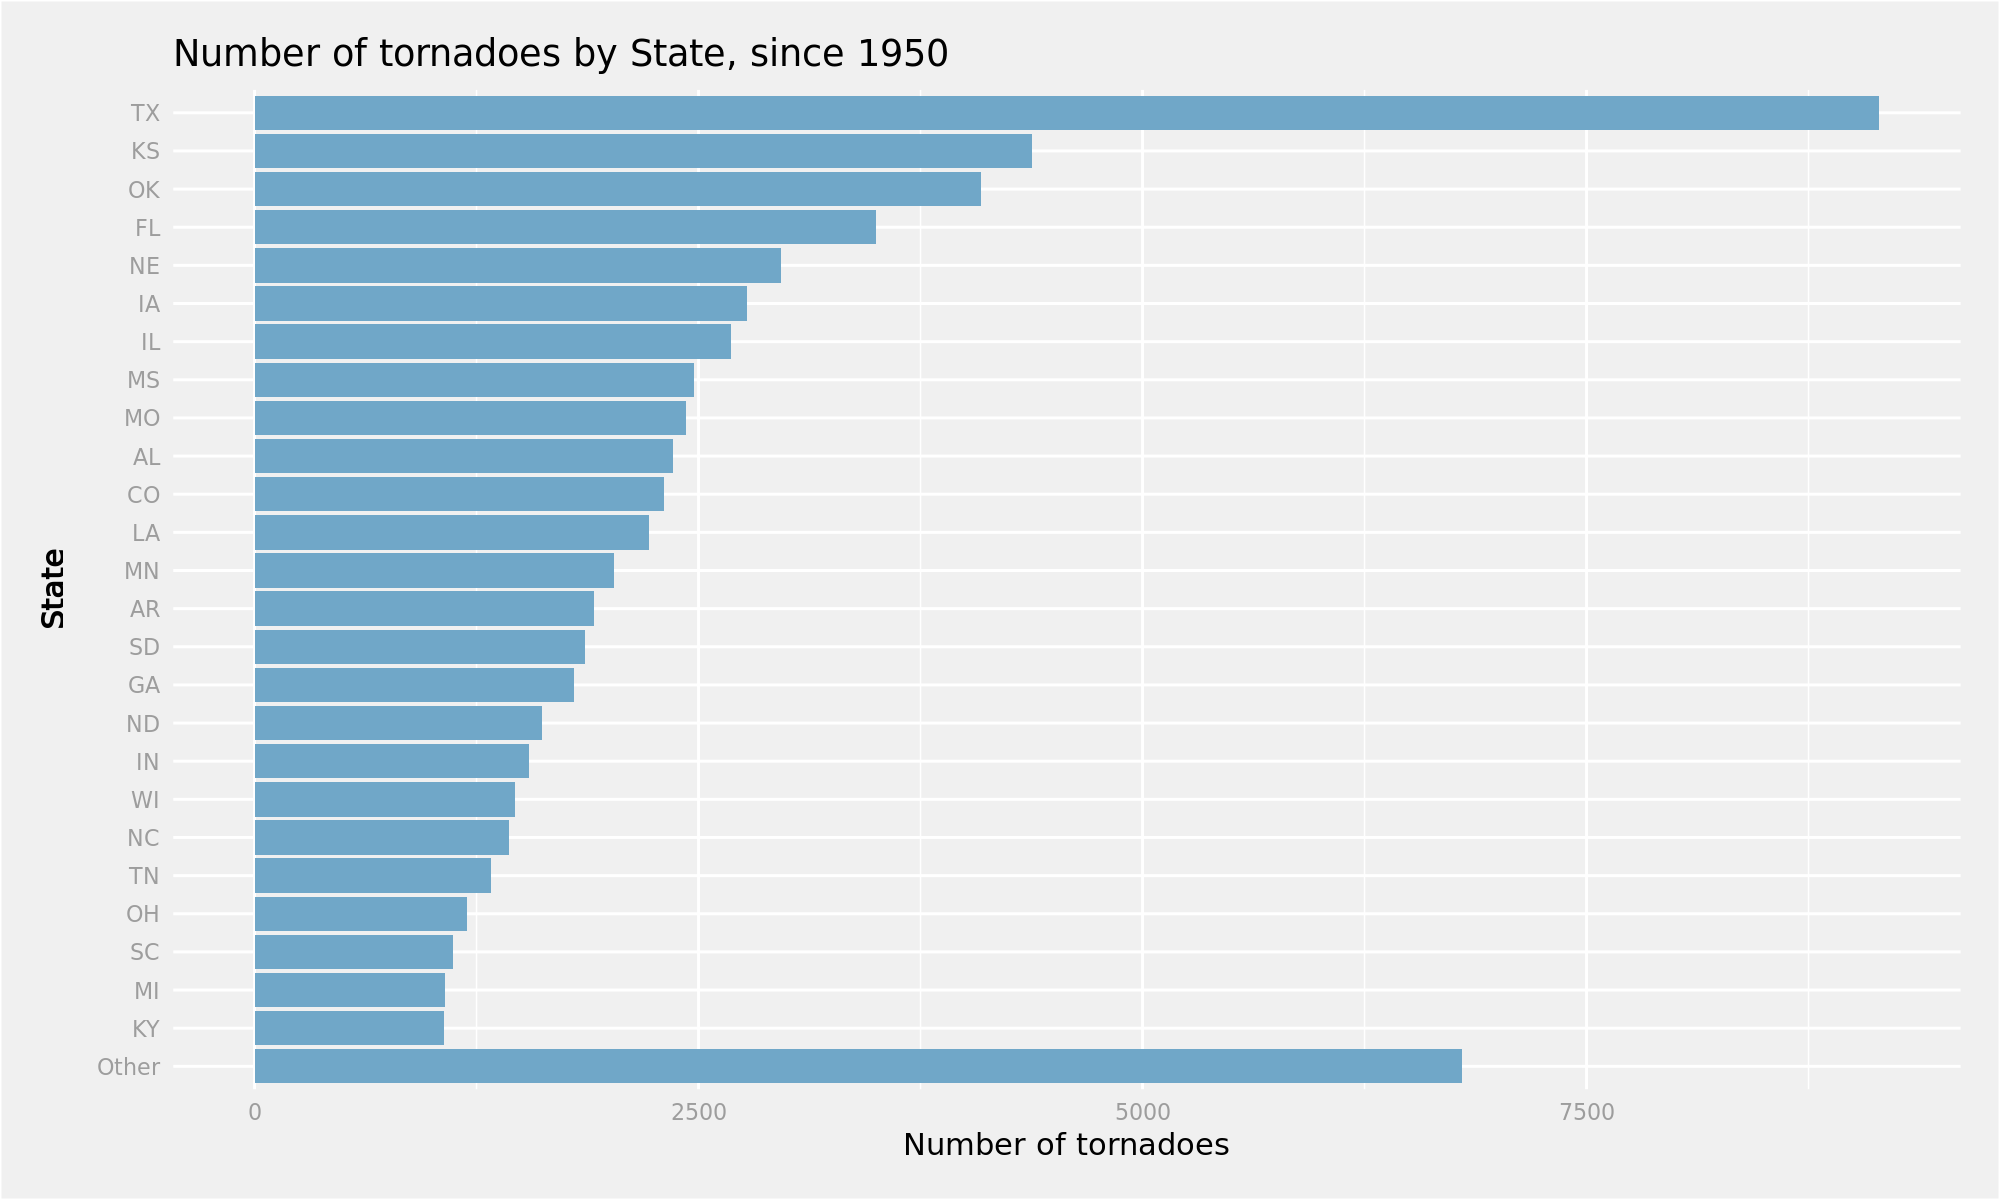

In [10]:
bg = '#f0f0f0' #defining a color that I will use in the theme () section of ggplot

#Figuring out which states have the most tornadoes and plotting them in descending order
tornadoes_sorted = tornadoes |>
    mutate (st_sorted = st |>
            fct_infreq() |> #putting states in order of the # tornadoes they have
            fct_lump(n=25) |> #lumping any states with <=25 tornado incidences into the "other" category
            fct_relevel ("Other", after=Inf) |> #moving the "other" category to the end
            fct_rev()) #reversing the order so that the state w/ the greatest # of tornadoes is at the top

p = ggplot(tornadoes_sorted, aes(y = st_sorted)) +
    geom_bar(fill='#70A7C8') +
    xlab ("Number of tornadoes") +
    ylab ("State") +
    ggtitle("Number of tornadoes by State, since 1950") + 
    theme(
          plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
          plot.background = element_rect(fill = bg),
          panel.background = element_rect(fill = bg),
          axis.ticks = element_blank(),
          axis.title.y = element_text(face = 'bold', margin = margin(r = 10)),
          axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 8))


options (repr.plot.res=200, repr.plot.width=10, repr.plot.height=6)
p

I figured that graphing injuries by year would be an interesting way to shed some light on temporal trends in how tornadoes are impacting communities. I decided to analyze from the year 2000 onward, since a line chart all the way back to 1950 would likely be crowded, and not quite relevant within the context of today's society, as the Earth's changing climate has likely influenced extreme weather patterns. From the line chart below, we can see that, interestingly, Oklahoma has more injuries than other states from 2008-2014. Texas remains comparable to other states except for in 2015, when there is a huge spike in injuries that far surpasses any of the other states. I decided to "zoom in" on what was happening in Texas in 2015 and examine the magnititude of tornadoes that occurred that year, to determine if there were any months in particular that tornadoes were more severe.

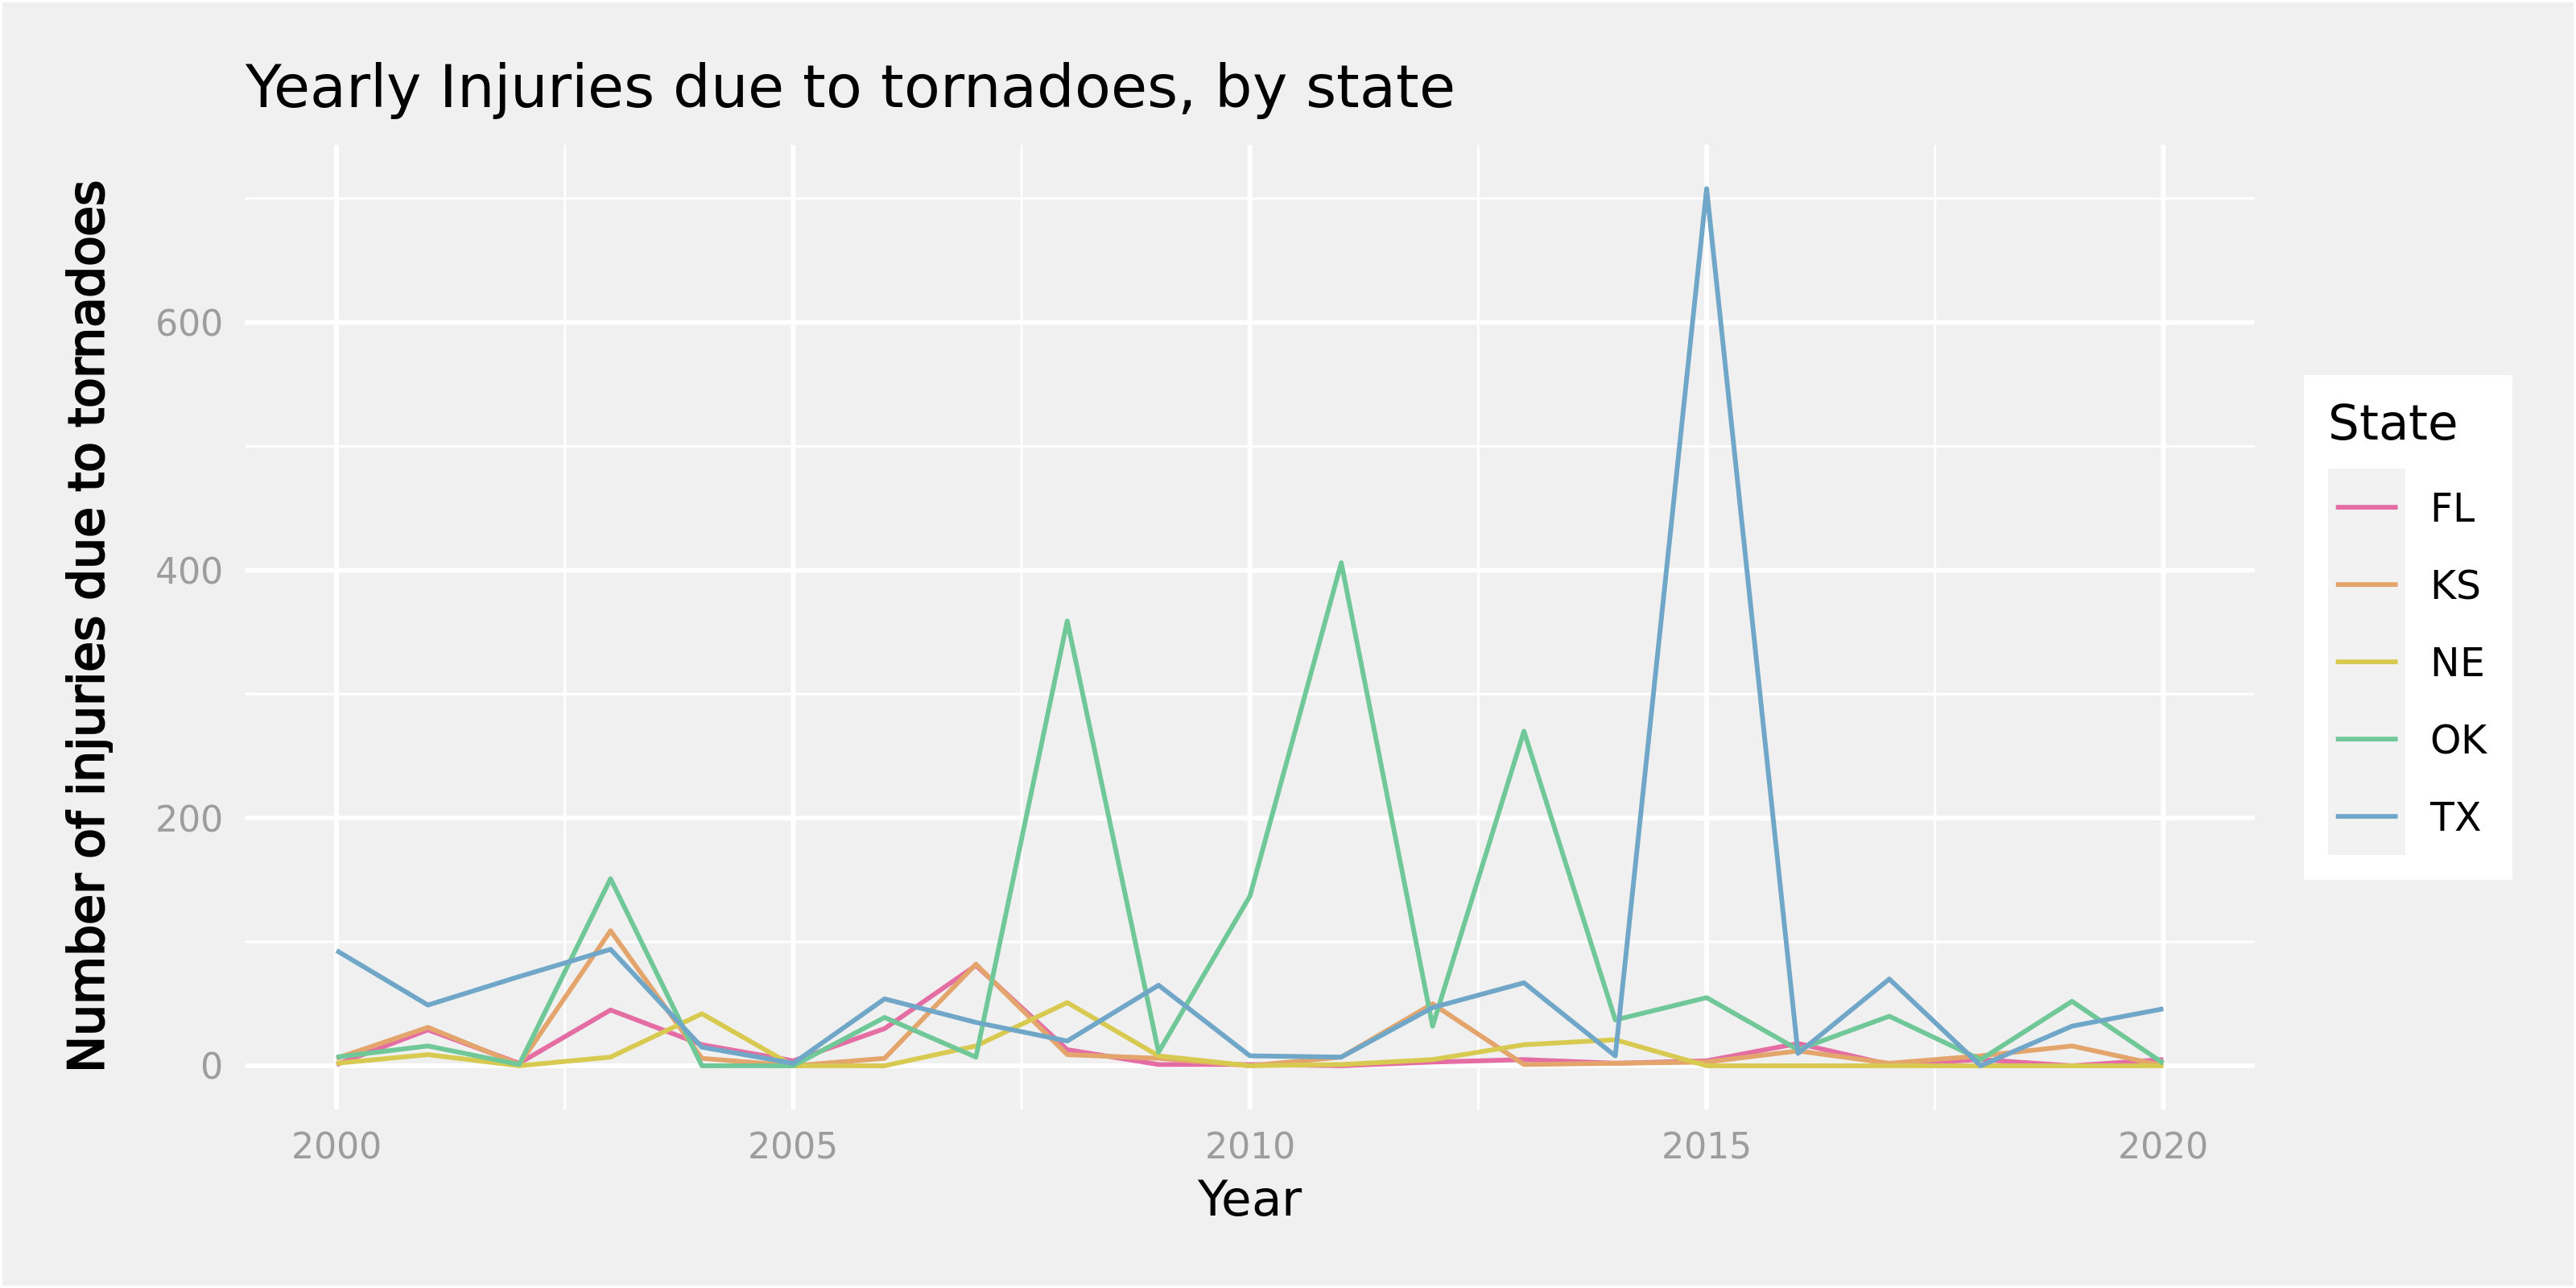

In [11]:
#I want to examine how tornado injuries vary by year in the top 5 states, but only from 2000-2020 since these are more recent.

colors=c("#E46DA3", "#E4A56D", "#D8CA50","#70C898","#70A7C8") #defining a colors vector I'll pass into scale_color_manual later

top_tornadoes = tornadoes |>
    filter (st %in% c("TX","KS","OK","FL","NE")) |>
    filter (yr %in% c(2000:2020)) |>
    group_by (st,yr) |>
    summarize(inj_per_yr = sum(inj), .groups="drop")

options (repr.plot.res = 400, repr.plot.width=8, repr.plot.height=4)
p = ggplot (top_tornadoes, 
            aes(x=yr, y=inj_per_yr, color=st, group=st)) + 
    geom_line() +
    xlab ("Year") +
    ylab("Number of injuries due to tornadoes") +
    ggtitle ("Yearly Injuries due to tornadoes, by state") + 
    scale_color_manual(values=colors, name = "State")+
    theme(
          plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
          plot.background = element_rect(fill = bg),
          panel.background = element_rect(fill = bg),
          axis.ticks = element_blank(),
          axis.title.y = element_text(face = 'bold', margin = margin(r = 10)),
          axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 8))
    
p 

Examining tornado magnitudes in 2015, from the scatterplot below, we can see that tornadoes are much less frequent during the summer months, but during the fall and spring they rise in frequency and magnitude. There was no data for January through March, which is why they are excluded from this graph, which means we can probably assume no tornadoes were recorded in Texas in 2015 during the late winter/early spring (because other years do have data for these months). The highest tornado magnitudes occur in mid-May and late December.

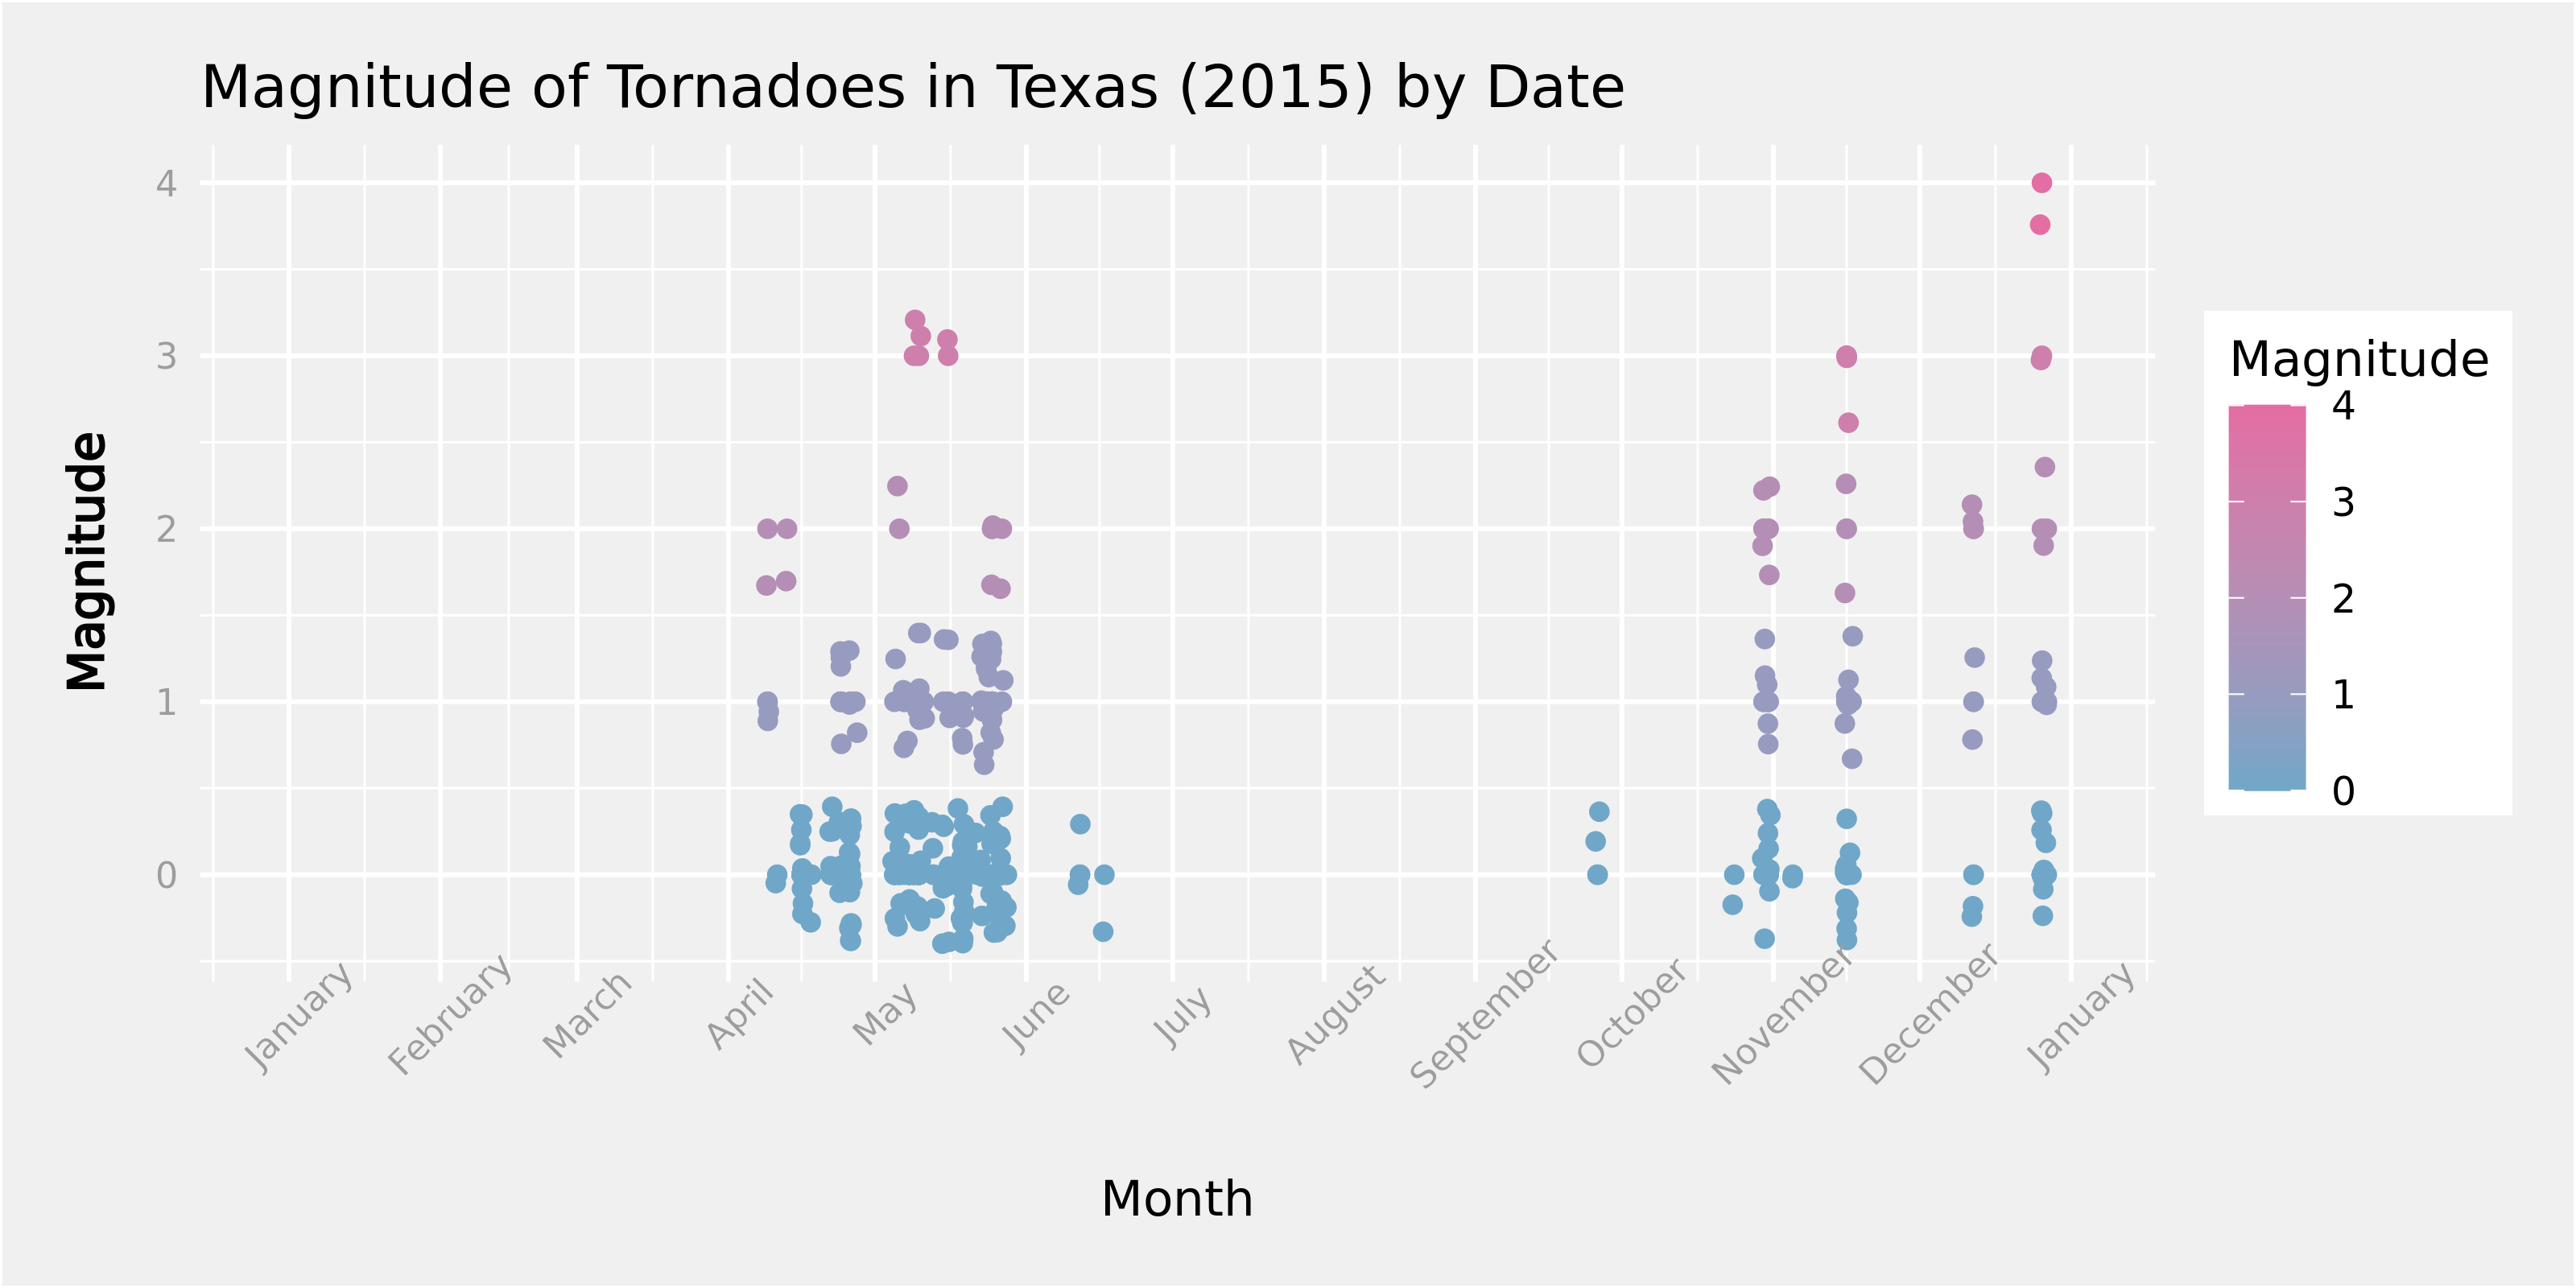

In [18]:
#There was a huge spike in Texas in 2015 so let's figure out what was going on that year
#in terms of tornado frequency and magnitudes

texas = tornadoes |>
    filter (st %in% c("TX")) |>
    filter (yr %in% c("2015")) |>
    select (date, mag) 
    
#texas 

p = ggplot (texas, aes(x=date, y=mag, color=mag)) + geom_point() + 
    scale_x_date(date_breaks='1 month', date_labels="%B", limits = ymd(c("2015/01/01", "2015/12/31"))) +
    theme(axis.text.x=element_text( angle= 45)) + xlab("Month") + ylab("Magnitude") + 
    ggtitle("Magnitude of Tornadoes in Texas (2015) by Date")+
    theme(
          plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
          plot.background = element_rect(fill = bg),
          panel.background = element_rect(fill = bg),
          axis.ticks = element_blank(),
          axis.title.y = element_text(face = 'bold', margin = margin(r = 10)),
          axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 8)) +
    scale_color_gradient(high = "#E46DA3", low = "#70A7C8", name = "Magnitude") +
    geom_jitter()
p